# Data Wrangling

### Import libraries

In [239]:
import numpy as np
import pandas as pd
import requests
import tweepy
import json
import seaborn as sns
from functools import reduce
import matplotlib.pyplot as plt


## Gathering Data

In [240]:
# On hand WeRateDogs Twitter archive file
df1=pd.read_csv('twitter-archive-enhanced.csv')

In [241]:
# extract tweet_id
df1.tweet_id=df1.expanded_urls.str.extract('(\d{18})')
df1.tweet_id[0:2]

0    892420643555336193
1    892177421306343426
Name: tweet_id, dtype: object

In [242]:
# Download tweet image predictions file using URL

response= requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

with open('image_prediction.tsv',mode='wb')as file:
    file.write(response.content)

df2=pd.read_csv('image_prediction.tsv',delimiter='\t')


In [243]:

consumer_key = 'XXX'
consumer_secret = 'XXX'
access_token = 'XXX'
access_secret = 'XXX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


In [244]:
"""txt_file=open('tweet_json.txt','w')
for tweet_id in df1.tweet_id:
    try:
        tweet_info=api.get_status(str(tweet_id),tweet_mode='extended')
        retweet_count=tweet_info.retweet_count
        print(tweet_id)
        favorite_count=tweet_info.favorite_count
        txt_file.write(tweet_id+' '+str(retweet_count)+' '+str(favorite_count)+'\n')  
    except Exception as e:
        print('error:'+ str(tweet_id))
txt_file.close()"""

"txt_file=open('tweet_json.txt','w')\nfor tweet_id in df1.tweet_id:\n    try:\n        tweet_info=api.get_status(str(tweet_id),tweet_mode='extended')\n        retweet_count=tweet_info.retweet_count\n        print(tweet_id)\n        favorite_count=tweet_info.favorite_count\n        txt_file.write(tweet_id+' '+str(retweet_count)+' '+str(favorite_count)+'\n')  \n    except Exception as e:\n        print('error:'+ str(tweet_id))\ntxt_file.close()"

In [245]:
df3=pd.DataFrame(columns=['tweet_id','retweet_count','favorite_count'])
with open('tweet_json.txt','r')as file:
    for line in file:
        tweet_id,retweet_count,favorite_count=line[:-1].split(' ')
        df3=df3.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)

## Assessing Data 

In [246]:
df1.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [247]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2190 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [248]:
df1.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
Lucy         11
Tucker       10
Penny        10
Lola         10
Bo            9
Winston       9
Sadie         8
the           8
Toby          7
Bailey        7
Daisy         7
Buddy         7
an            7
Leo           6
Bella         6
Koda          6
Jack          6
Rusty         6
Milo          6
Oscar         6
Dave          6
Jax           6
Stanley       6
Scout         6
Finn          5
           ... 
Gin           1
Tilly         1
Meera         1
Georgie       1
Sailer        1
Heinrich      1
Jeremy        1
Tupawc        1
Link          1
Binky         1
Arlen         1
Skittles      1
Brownie       1
Lili          1
Dylan         1
Ruffles       1
Gòrdón        1
Henry         1
Dietrich      1
Loomis        1
Torque        1
Rodman        1
Mimosa        1
old           1
Griswold      1
Sky           1
Burt          1
Acro          1
Geoff         1
Juckson       1
Name: name, Length: 957,

<div class="alert alert-block alert-info">
<b>Quality Issues:</b> <br>
- 'None' in the dataset should be replaced by 'NaN' in columns: name, doggo, floofer, pupper, and puppo. <br>
- replace dog name with NaN for not corrected dog name like 'a' and 'an'<br>
- Missing data in columns: name, doggo, floofer, pupper, and puppo. <br>
- Wrong data types in timestamp column. <br>
- Drop rows that contain null value in tweet_id <br>
- Remove rows that rating_denominator is not equal to 10 <br>
- Remove outliers from rating_numerator<br>
<b>Tidiness issues:</b><br>
- doggo, floofer, pupper, and puppo should be in one column.<br>
- Replace numerator and denominator columns with DogRate 


</div>

In [249]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [250]:
df2.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
Cardigan                      19
web_site                      19
Eskimo_dog                    18
Maltese_dog                   18
beagle                        18
teddy                         18
Shetland_sheepdog             18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

<div class="alert alert-block alert-info">
<b>Quality Issues:</b> <br>
- Some predictions are not dogs, like seat_belt, web_site, and remote_control.<br>
- Data Type is wrong: tweet_id. <br>
- Change column name: like p1_conf and p1_dog.<br>
- Capitalize prediction dog type and remove underscore. <br>

</div>

In [251]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 3 columns):
tweet_id          2178 non-null object
retweet_count     2178 non-null object
favorite_count    2178 non-null object
dtypes: object(3)
memory usage: 51.1+ KB


In [252]:
df3[df3['tweet_id'].duplicated()]


,tweet_id,retweet_count,favorite_count
23,887473957103951883,17766,67726
71,878281511006478336,1267,7603
72,878057613040115712,6694,41278
94,873213775632977920,1564,7129
117,868880397819494401,14451,65129
120,868552278524837888,2097,10060
129,866450705531457537,35403,121827
130,866334964761202691,14495,52386
143,863062471531167744,2476,8539
154,860563773140209665,2187,7546


<div class="alert alert-block alert-info">
<b>Quality Issues:</b> <br>
- Remove duplicated rows  <br>
<b>Tidiness issues:</b> <br>
- Merge the three dataframes with tweet_id column. 
</div>

## Cleaning Data 

### Copy datasets 

In [275]:
df1_clean = df1.copy() 
df2_clean = df2.copy()
df3_clean = df3.copy()

#### Define

Delete null rows in tweet_id column, and delete columns'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'

#### Code

In [276]:

df1_clean=df1_clean[df1.tweet_id.notnull()]
df1_clean=df1_clean.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'])


#### Test

In [277]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2190 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2190 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2190 non-null object
source                   2190 non-null object
text                     2190 non-null object
expanded_urls            2190 non-null object
rating_numerator         2190 non-null int64
rating_denominator       2190 non-null int64
name                     2190 non-null object
doggo                    2190 non-null object
floofer                  2190 non-null object
pupper                   2190 non-null object
puppo                    2190 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 256.6+ KB


#### Define
Replace doggo, floofer, pupper, and puppo columns with one column (DogStage).

#### Code

In [278]:
# Extract dog stages from the four columns to one
df1_clean['DogStage'] = df1_clean[df1_clean.columns[-4:]].apply(lambda x: ','.join(x.dropna().astype(str)),
                                         axis=1)
df1_clean['DogStage'] = df1_clean['DogStage'].map(lambda x: x.lstrip('None,').rstrip(''))
df1_clean['DogStage'].unique().tolist()

['',
 'doggo,None,None,None',
 'puppo',
 'pupper,None',
 'floofer,None,None',
 'doggo,None,None,puppo',
 'doggo,floofer,None,None',
 'doggo,None,pupper,None']

In [279]:
map_DogStage ={'': "None",
 'doggo,None,None,None' : "doggo",
 'puppo' : "puppo",
 'pupper,None':"pupper",
 'floofer,None,None': "pupper",
 'doggo,None,None,puppo': "pupper, puppo",
 'doggo,floofer,None,None': "doggo, floofer",
 'doggo,None,pupper,None': "floofer, pupper"}

In [280]:
df1_clean['DogStage'].replace(map_DogStage, inplace=True)


#### Test

In [281]:
df1_clean.DogStage.value_counts()

None               1846
pupper              231
doggo                74
puppo                26
floofer, pupper      11
doggo, floofer        1
pupper, puppo         1
Name: DogStage, dtype: int64

#### Define
Drop the doggo, floofer, pupper, and puppo columns.
#### Code

In [282]:

df1_clean = df1_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo', 'in_reply_to_status_id', 'in_reply_to_user_id'])


#### Test

In [283]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2190 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2190 non-null object
timestamp             2190 non-null object
source                2190 non-null object
text                  2190 non-null object
expanded_urls         2190 non-null object
rating_numerator      2190 non-null int64
rating_denominator    2190 non-null int64
name                  2190 non-null object
DogStage              2190 non-null object
dtypes: int64(2), object(7)
memory usage: 171.1+ KB


#### Define 
replace the 'None' to NAN https://stackoverflow.com/questions/17097236/how-to-replace-values-with-none-in-pandas-data-frame-in-python

#### Code 


In [284]:
df1_clean = df1_clean.replace('None', np.nan)

#### Test

In [285]:

df1_clean[df1_clean['name'] == 'None']


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,DogStage


#### Define
replace dog name with NaN for not corrected dog name like 'a' and 'an'

#### Code

In [286]:

dog_name_list = ['None', 'a', 'an', 'the', 'Bookstore', 'such', 'Cash', 'quite']

for name in dog_name_list:
    df1_clean.name.replace(name, np.nan , inplace=True)
    

#### Test

In [287]:
df1_clean.name.value_counts()

Charlie     12
Cooper      11
Oliver      11
Penny       10
Lucy        10
Tucker      10
Bo           9
Lola         9
Winston      9
Sadie        8
Buddy        7
Daisy        7
Toby         7
Leo          6
Bella        6
Jack         6
Rusty        6
Dave         6
Stanley      6
Koda         6
Milo         6
Scout        6
Jax          6
Bailey       6
Phil         5
Larry        5
Chester      5
Oscar        5
very         5
Louis        5
            ..
Mitch        1
Sweet        1
Mutt         1
JD           1
Staniel      1
Nico         1
Ike          1
Kaiya        1
Furzey       1
Maisey       1
Beya         1
Al           1
Mosby        1
Bobby        1
Tiger        1
Hazel        1
Rilo         1
Bones        1
Juckson      1
Kenzie       1
Rooney       1
Cilantro     1
Bobble       1
Wishes       1
Birf         1
Blitz        1
Dook         1
Ester        1
Ralphson     1
Jim          1
Name: name, Length: 929, dtype: int64

#### Define
change data type for timestamp. 

#### Code

In [288]:

df1_clean.timestamp=pd.to_datetime(df1_clean.timestamp)


#### Test

In [289]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2190 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2190 non-null object
timestamp             2190 non-null datetime64[ns]
source                2190 non-null object
text                  2190 non-null object
expanded_urls         2190 non-null object
rating_numerator      2190 non-null int64
rating_denominator    2190 non-null int64
name                  1482 non-null object
DogStage              344 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 171.1+ KB


#### Define

Drop rows that contain null value in tweet_id https://stackoverflow.com/questions/46091924/python-how-to-drop-a-row-whose-particular-column-is-empty-nan

#### Code

In [290]:
df1_clean = df1_clean[df1_clean['tweet_id'].notnull()]

#### Test

In [291]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2190 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2190 non-null object
timestamp             2190 non-null datetime64[ns]
source                2190 non-null object
text                  2190 non-null object
expanded_urls         2190 non-null object
rating_numerator      2190 non-null int64
rating_denominator    2190 non-null int64
name                  1482 non-null object
DogStage              344 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 171.1+ KB


#### Define

Remove rows that rating_denominator is not equal to 10

#### Code

In [292]:
df1_clean = df1_clean[df1_clean.rating_denominator == 10]

#### Test

In [293]:
df1_clean.rating_denominator.value_counts()

10    2171
Name: rating_denominator, dtype: int64

#### Define

remove outliers from rating_numerator https://stackoverflow.com/questions/31663426/python-pandas-drop-rows-from-data-frame-on-string-match-from-list
    
#### Code

In [294]:
outlier = [75,0,26,27,1776,420 ]
df1_clean = df1_clean[~df1_clean['rating_numerator'].isin(outlier)]

#### Test

In [295]:
df1_clean.rating_numerator.value_counts()

12    510
10    440
11    431
13    316
9     151
8      99
7      52
14     49
5      34
6      32
3      19
4      15
2       9
1       5
15      1
Name: rating_numerator, dtype: int64

#### Define
Replace numerator and denominator columns with DogRate 

#### Code

In [297]:
df1_clean['DogRate'] = df1_clean['rating_numerator']/df1_clean['rating_denominator']
df1_clean=df1_clean.drop(columns=['rating_numerator','rating_denominator'])


#### Test


In [298]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2163 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id         2163 non-null object
timestamp        2163 non-null datetime64[ns]
source           2163 non-null object
text             2163 non-null object
expanded_urls    2163 non-null object
name             1474 non-null object
DogStage         343 non-null object
DogRate          2163 non-null float64
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 152.1+ KB


#### Define 

change tweet_id datatype to str. 

#### Code

In [299]:

df2_clean.tweet_id=df2_clean.tweet_id.astype(str)

#### Test

In [300]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Define

Capitalize prediction dog type and remove underscore.

#### Code

In [301]:

for i in ('p1','p2','p3'):
    df2_clean[str(i)]=df2_clean[str(i)].str.replace("_", ' ')
    df2_clean[str(i)]=df2_clean[str(i)].str.title()
    

#### Test

In [302]:
df2_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define
Change columns name.

#### Code

In [303]:
df2_clean = df2_clean.rename(columns={'p1': 'FirstPrediction',
                                    'p1_conf': 'FirstPredictionConfident',
                                    'p1_dog': 'IsFirstPredictionConfidentBreedDog',
                                    'p2': 'SecondPrediction',
                                    'p2_conf': 'SecondPredictionConfident',
                                    'p2_dog': 'IsSecondPredictionConfidentBreedDog',
                                    'p3': 'ThirdPrediction',
                                    'p3_conf': 'ThirdPredictionConfident',
                                    'p3_dog': 'IsThirdPredictionConfidentBreedDog'})

#### Test

In [304]:
df2_clean.head()

,tweet_id,jpg_url,img_num,FirstPrediction,FirstPredictionConfident,IsFirstPredictionConfidentBreedDog,SecondPrediction,SecondPredictionConfident,IsSecondPredictionConfidentBreedDog,ThirdPrediction,ThirdPredictionConfident,IsThirdPredictionConfidentBreedDog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define

drop duplicated rows https://stackoverflow.com/questions/23667369/drop-all-duplicate-rows-in-python-pandas

#### Code

In [305]:
df3_clean = df3_clean.drop_duplicates()

#### test

In [306]:
df3_clean.duplicated().sum()

0

#### Define
Merge the dataframes 

#### Code

In [307]:
dataframes = [df1_clean, df2_clean, df3_clean]
twitter_archive_master = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), dataframes)

#### Test

In [308]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121 entries, 0 to 2120
Data columns (total 21 columns):
tweet_id                               2121 non-null object
timestamp                              2121 non-null datetime64[ns]
source                                 2121 non-null object
text                                   2121 non-null object
expanded_urls                          2121 non-null object
name                                   1478 non-null object
DogStage                               336 non-null object
DogRate                                2121 non-null float64
jpg_url                                2121 non-null object
img_num                                2121 non-null int64
FirstPrediction                        2121 non-null object
FirstPredictionConfident               2121 non-null float64
IsFirstPredictionConfidentBreedDog     2121 non-null bool
SecondPrediction                       2121 non-null object
SecondPredictionConfident              2121 non

## Save Dataframes

In [309]:
# https://stackoverflow.com/questions/16923281/pandas-writing-dataframe-to-csv-file

twitter_archive_master.to_csv("twitter_archive_master.csv", encoding='utf-8')
df1_clean.to_csv("twitter-archive-enhanced_clean.csv", encoding='utf-8')
df2_clean.to_csv("image-predictions_clean.tsv", encoding='utf-8')
df3_clean.to_csv("tweet_json,txt", encoding='utf-8')


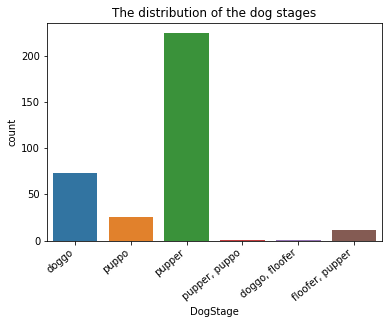

In [310]:
# hist for the distribution of dog stages
dogstages = sns.countplot(twitter_archive_master['DogStage'])
dogstages.set_xticklabels(dogstages.get_xticklabels(), rotation=40, ha="right")
dogstages.set_title('The distribution of the dog stages')
fig = dogstages.get_figure()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


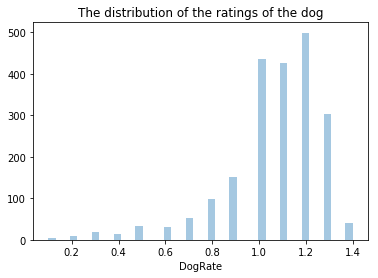

In [311]:

# hist for the distribution of dog rate
rate = sns.distplot(twitter_archive_master.DogRate, kde = False)
rate.set_title('The distribution of the ratings of the dog') 
fig = rate.get_figure()


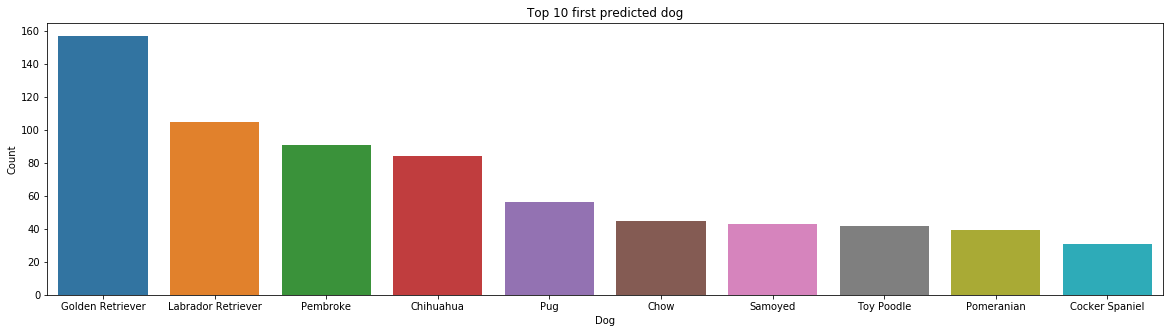

In [312]:
# hist for the Top 10 predicted dog
FirstP  = twitter_archive_master['FirstPrediction'].value_counts()
FirstP = FirstP[:10,]
plt.figure(figsize=(20,5))
sns.barplot(FirstP.index, FirstP.values)
plt.title('Top 10 first predicted dog')
plt.ylabel('Count')
plt.xlabel('Dog')
plt.show()